In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import itertools
import pandas as ps
#import scitools
%matplotlib inline
from numpy import linspace, zeros
import random

<Figure size 432x288 with 0 Axes>

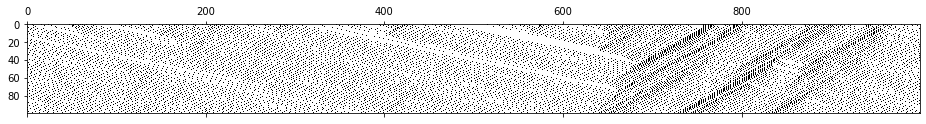

In [3]:
num_cells = 1000
num_timesteps = 100

v_max = 5

c = 0.15
p = 0.1

autobahn_old = zeros(num_cells)
velocity_old = zeros(num_cells)

autobahn_new = zeros(num_cells)
velocity_new = zeros(num_cells)

autobahn_matrix = zeros([num_cells, num_timesteps])

# initialize where the cars are initially
for i in range(num_cells):
    if random.random() < c:
        autobahn_new[i] = 1

for k in range(num_timesteps):
    autobahn_old = autobahn_new
    velocity_old = velocity_new
    # first step: acceleration
    for i in range(num_cells):
        if autobahn_old[i] == 1:
            velocity_old[i] = min(velocity_old[i] + 1, v_max)
    # second step: deceleration
    for i in range(num_cells):
        if autobahn_old[i] == 1:
            dist = 0
            while dist <= v_max + 1:
                if autobahn_old[(i + dist + 1) % num_cells] == 1:
                    break
                dist += 1
            if dist <= v_max:
                velocity_old[i] = max(dist - 1, 0)
    # third step: driving slowly
    for i in range(num_cells):
        if autobahn_old[i] == 1:
            if random.random() < p:
                velocity_old[i] = max(velocity_old[i] - 1, 0)
    # fourth step: actually driving
    autobahn_new = zeros(num_cells)
    velocity_new = zeros(num_cells)
    for i in range(num_cells):
        if autobahn_old[i] == 1:
            new_index = int(i + velocity_old[i])%num_cells
            autobahn_new[new_index] = 1
            velocity_new[new_index] = velocity_old[i]
            
    autobahn_matrix[:, k] = autobahn_new
    
plt.set_cmap('binary')
plt.matshow(autobahn_matrix.transpose())

In [1]:
# change in the first folder
print('One!')

One!
